## Basic of tag

- Example

```
<span style="font-size: 20px;font-weight:bold">Hell world</span>
```

- Preview

<span style="font-size: 20px;font-weight:bold">Hell world</span>

- tag: span
- attribute: style="font-size: 20px;font-weight:bold"
    - Additional info
    - name/value format
    
https://www.w3schools.com/html/html_attributes.asp

## What is DOM (Document Object Model)

[Mozilla Define](https://developer.mozilla.org/ko/docs/Web/API/Document_Object_Model/Introduction)

- Programming Interface for HTML, XML (Can easily read, create, update, delete contents)
- Converted from document to tree data-structure!

### HTML

<img width="721" alt="스크린샷 2022-11-19 19 53 04" src="https://user-images.githubusercontent.com/16532326/202847128-cba49b7a-a96e-4151-bf10-6e351226201f.png">

- Open chrome developer tool

### DOM

<img width="480" height="auto" src="https://user-images.githubusercontent.com/16532326/202847294-1aa04b39-c3c3-4969-bc70-ec1aa989ee93.jpg"/>

```
document.children
## result
childElementCount: 2
childNodes: NodeList(3) [head, text, body]
children: HTMLCollection(2)
    0: head
    1: body
length: 2
[[Prototype]]: HTMLCollection
classList: DOMTokenList [value: '']
```

[DOM viewer](http://bioub.github.io/dom-visualizer/)

[Youtube tutorial link](https://youtu.be/ipkjfvl40s0)



## What is Xpath

- Query language that navigating in HTML/XML documents ([Reference](https://ko.wikipedia.org/wiki/XPath))

[Query examples](https://www.w3schools.com/xml/xpath_syntax.asp)

[Youtube tutorial link](https://youtu.be/U-MZJ6rbqi4)

## CSS selector

[CSS selector examples](https://www.w3schools.com/csSref/css_selectors.php)

In [1]:
!pip3 install selenium==4.6.0
!pip3 install webdriver-manager==3.8.5

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By

from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.core.utils import ChromeType
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

import os

from IPython import display
from base64 import b64decode

chrome_service = Service(ChromeDriverManager().install())

In [3]:
# Get environment variables
IS_GITHUB_ACTION = os.getenv('IS_GITHUB_ACTION')

In [4]:
chrome_options = Options()
if IS_GITHUB_ACTION:
    options = [
        "--headless",
        "--disable-gpu",
        "--window-size=1920,1080",
        "--ignore-certificate-errors",
        "--disable-extensions",
        "--no-sandbox",
        "--disable-dev-shm-usage"
    ]
    user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'    
    chrome_options.add_argument('user-agent={0}'.format(user_agent))
    for option in options:
        chrome_options.add_argument(option)

https://stackoverflow.com/a/54433282

Some sites require user agent field in request header

In [5]:
!ls -al

total 189192
drwxr-xr-x  33 stories2  staff      1056 12 24 11:02 .
drwxr-xr-x@ 57 stories2  staff      1824 12 24 00:18 ..
drwxr-xr-x  16 stories2  staff       512 12 24 11:02 .git
drwxr-xr-x   3 stories2  staff        96 11 19 23:03 .github
-rw-r--r--   1 stories2  staff      7745 12 10 23:01 .gitignore
drwxr-xr-x   8 stories2  staff       256 12 10 19:22 .ipynb_checkpoints
-rw-r--r--   1 stories2  staff    498880 11 26 20:49 Asiana covid info crawler.ipynb
-rw-r--r--   1 stories2  staff   6062937 12 24 11:02 Crawl go-tokyo multi process, multi threading.ipynb
-rw-r--r--   1 stories2  staff  15546932 12 10 21:03 Crawl go-tokyo.ipynb
-rw-r--r--   1 stories2  staff     84692 11 26 21:43 Hotels combine crawler.ipynb
-rw-r--r--   1 stories2  staff      1065 11  6 11:29 LICENSE
-rw-r--r--   1 stories2  staff       856 11 20 00:31 README.md
-rw-r--r--   1 stories2  staff    213358 12 18 02:05 Skyscanner covid info crawler.ipynb
drwxr-xr-x   4 stories2  staff       128 12 11 01:29 __pycache

In [6]:
!pwd

/Users/stories2/Documents/GitHub/python-data-crawler


In [7]:
!cd

In [8]:
my_dir=!pwd

In [9]:
my_dir[0]

'/Users/stories2/Documents/GitHub/python-data-crawler'

```
## for windows
browser = webdriver.Chrome(f'{my_dir[0]}\\chromedriver.exe')
```

In [10]:
# browser = webdriver.Chrome(f'{my_dir[0]}/chromedriver')    
browser = webdriver.Chrome(service=chrome_service, options=chrome_options)
browser.set_window_size(1920, 1080)
browser.get('https://flyasiana.com/C/KR/KO/contents/entry-restrictions')
# browser.get('https://www.skyscanner.co.kr/travel-restrictions/%EB%8C%80%EB%A7%8C/29475323?origin=29475329#MapContainer')

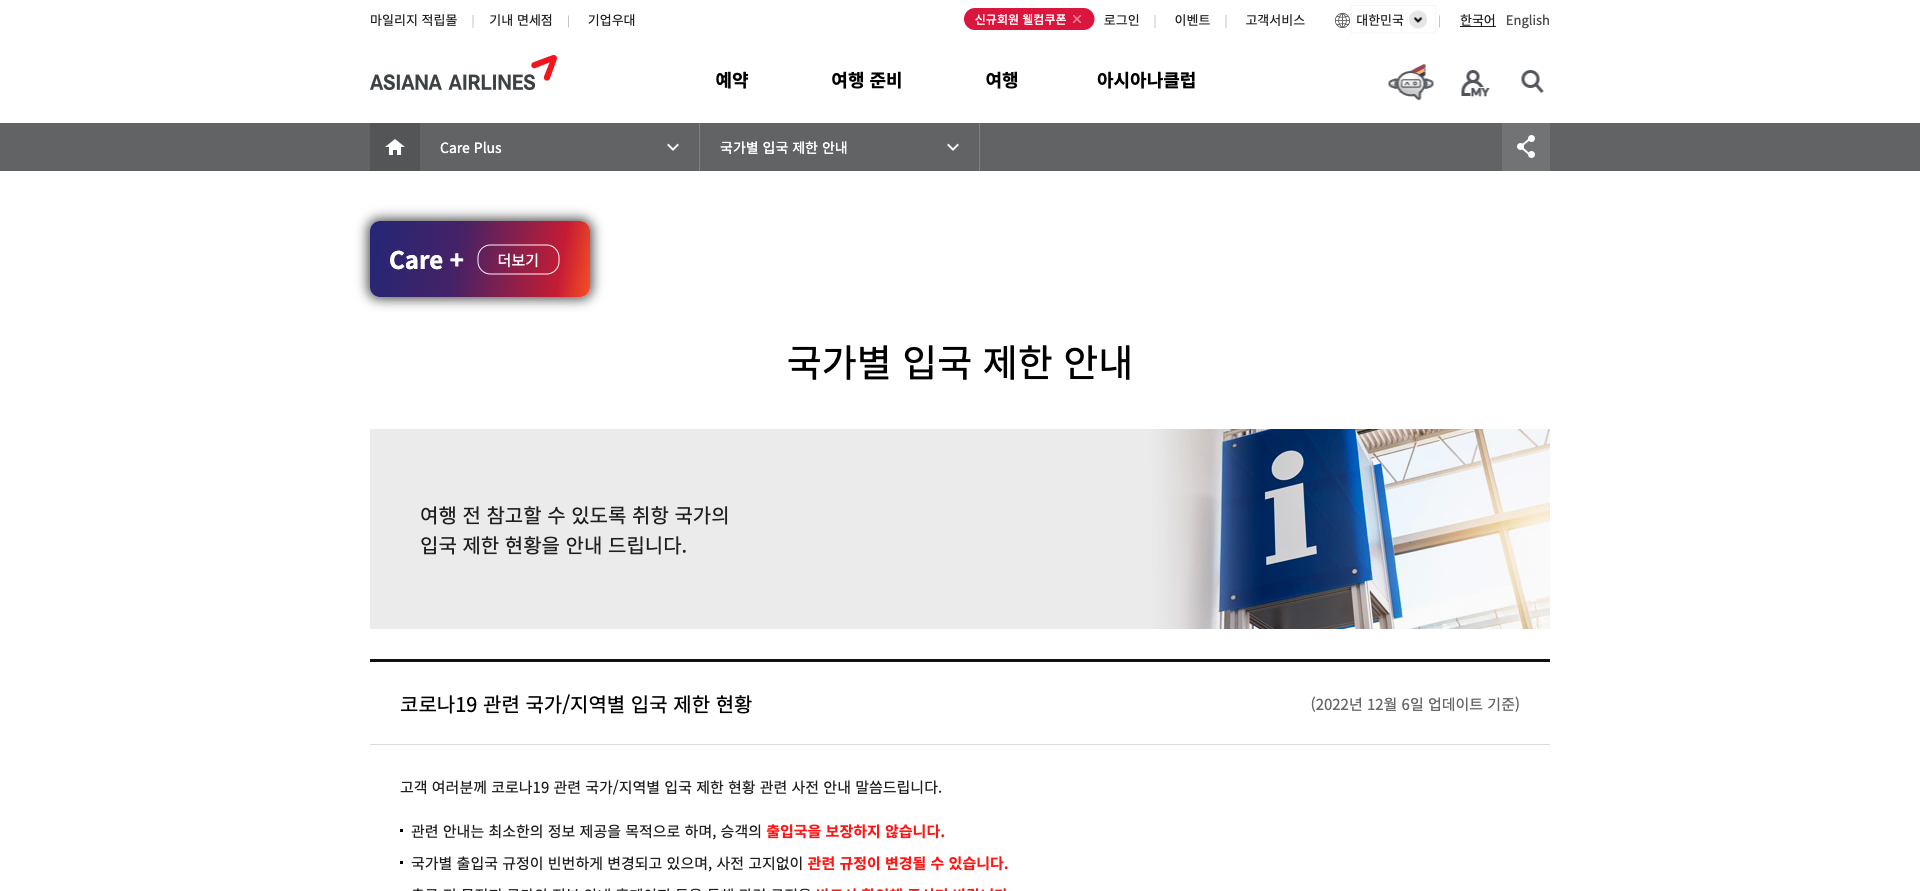

In [11]:
display.Image(b64decode(browser.find_element(By.TAG_NAME, 'body').screenshot_as_base64))

In [12]:
browser.find_element(By.CSS_SELECTOR, '#careplus > div > div.main_site > h3').text

'국가별 입국 제한 안내'

### Visualize crawling target as image

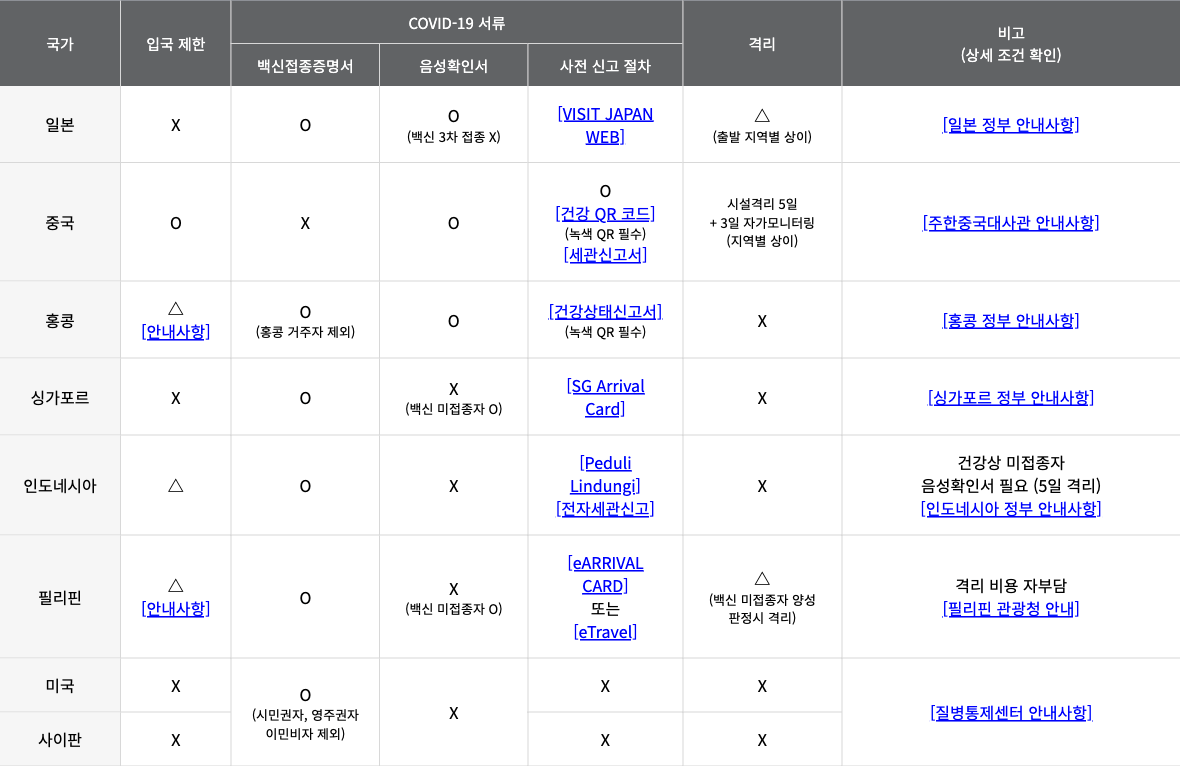

In [13]:
display.Image(b64decode(browser.find_element(By.CSS_SELECTOR, '#careplus > div > div.cms_wrap > div.cms-cont > div').screenshot_as_base64))

# browser.find_element_by_css_selector('#careplus > div > div.cms_wrap > div.cms-cont > div').screenshot_as_base64

![다운로드 (1)](https://user-images.githubusercontent.com/16532326/209417853-2291c54d-07e1-47de-850c-2c0e4179f0e9.png)

### Crawling country list

In [14]:
countryTable = browser.find_element(By.CSS_SELECTOR, '#careplus > div > div.cms_wrap > div.cms-cont > div')\
    .find_elements(By.CSS_SELECTOR, 'table')[0]
# for tr in trArry:
#     print(tr.get_attribute('innerHTML'))
# countryTable.get_attribute('innerHTML')
# for tr in countryTable.find_elements_by_tag_name('tr'):
#     print(tr.text)
    
countryName = [x.text for x in countryTable.find_elements(By.TAG_NAME, 'tr')][1:]
countryName
# trArry.find_elents_by_css_selector('tr')

['일본', '중국', '홍콩', '싱가포르', '인도네시아', '필리핀', '미국', '사이판']

### Crawl that country Covid-19 entry restrictions info

In [15]:
countryInfo = browser.find_element(By.CSS_SELECTOR, '#careplus > div > div.cms_wrap > div.cms-cont > div > table:nth-child(2) > tbody')

#.get_attribute('innerHTML')
#.text



In [16]:
tableResult = []

In [17]:
idx = 0;
for tr in countryInfo.find_elements(By.TAG_NAME, 'tr'):
    print(f'\n{countryName[idx]}')
#     print(tr.text)
    row = []
    for td in tr.find_elements(By.TAG_NAME, 'td'):
        text = td.text
        print(td.text, end=", ")
        try:
#             print(td.get_attribute('innerHTML'), 'test', )
#             aTag = td.find_element_by_tag_name('a')
#             if aTag is not None:
#                 print(a.get_attribute('href'))
            print(td.find_element(By.TAG_NAME, 'a').get_attribute('href'))
            text = text + ' ' + td.find_element(By.TAG_NAME, 'a').get_attribute('href')
        except:
            print('', end="")
        row.append(text)
    idx += 1
    tableResult.append(row)


일본
, X, O, O
(백신 3차 접종 X), [VISIT JAPAN WEB], https://vjw-lp.digital.go.jp/
△
(출발 지역별 상이), [일본 정부 안내사항], https://www.mofa.go.jp/ca/fna/page4e_001053.html

중국
, O, X, O, O
[건강 QR 코드]
(녹색 QR 필수)
[세관신고서], https://hrhk.cs.mfa.gov.cn/H5/
시설격리 5일
+ 3일 자가모니터링
(지역별 상이), [주한중국대사관 안내사항], http://kr.china-embassy.gov.cn/kor/lsfw/

홍콩
, △
[안내사항], https://www.immd.gov.hk/eng/services/visas/visit-transit/visit-visa-entry-permit.html
O
(홍콩 거주자 제외), O, [건강상태신고서]
(녹색 QR 필수), https://www.chp.gov.hk/hdf/
X, [홍콩 정부 안내사항], https://www.coronavirus.gov.hk/eng/inbound-travel.html

싱가포르
, X, O, X
(백신 미접종자 O), [SG Arrival Card], https://eservices.ica.gov.sg/sgarrivalcard/
X, [싱가포르 정부 안내사항], https://www.ica.gov.sg/enter-transit-depart/entering-singapore

인도네시아
, △, O, X, [Peduli Lindungi]
[전자세관신고], https://www.pedulilindungi.id/
X, 건강상 미접종자
음성확인서 필요 (5일 격리)
[인도네시아 정부 안내사항], https://www.imigrasi.go.id/en/covid19/#1621501651158-8e7bbdc3-bbb8

필리핀
, △
[안내사항], https://dfa.gov.ph/list-of-countries-for-21-day-visa
O, 

In [18]:
!pip3 install tabletext==0.1

  Using cached tabletext-0.1.tar.gz (6.1 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in tabletext setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [19]:
tableResult

[['',
  'X',
  'O',
  'O\n(백신 3차 접종 X)',
  '[VISIT JAPAN WEB] https://vjw-lp.digital.go.jp/',
  '△\n(출발 지역별 상이)',
  '[일본 정부 안내사항] https://www.mofa.go.jp/ca/fna/page4e_001053.html'],
 ['',
  'O',
  'X',
  'O',
  'O\n[건강 QR 코드]\n(녹색 QR 필수)\n[세관신고서] https://hrhk.cs.mfa.gov.cn/H5/',
  '시설격리 5일\n+ 3일 자가모니터링\n(지역별 상이)',
  '[주한중국대사관 안내사항] http://kr.china-embassy.gov.cn/kor/lsfw/'],
 ['',
  '△\n[안내사항] https://www.immd.gov.hk/eng/services/visas/visit-transit/visit-visa-entry-permit.html',
  'O\n(홍콩 거주자 제외)',
  'O',
  '[건강상태신고서]\n(녹색 QR 필수) https://www.chp.gov.hk/hdf/',
  'X',
  '[홍콩 정부 안내사항] https://www.coronavirus.gov.hk/eng/inbound-travel.html'],
 ['',
  'X',
  'O',
  'X\n(백신 미접종자 O)',
  '[SG Arrival Card] https://eservices.ica.gov.sg/sgarrivalcard/',
  'X',
  '[싱가포르 정부 안내사항] https://www.ica.gov.sg/enter-transit-depart/entering-singapore'],
 ['',
  '△',
  'O',
  'X',
  '[Peduli Lindungi]\n[전자세관신고] https://www.pedulilindungi.id/',
  'X',
  '건강상 미접종자\n음성확인서 필요 (5일 격리)\n[인도네시아 정부 안내사항] https://w

### Post processing

- Add country name to each first col

In [20]:
idx = 0
for country in countryName:
    tableResult[idx][0] = country
    idx = idx + 1
tableResult[0]

['일본',
 'X',
 'O',
 'O\n(백신 3차 접종 X)',
 '[VISIT JAPAN WEB] https://vjw-lp.digital.go.jp/',
 '△\n(출발 지역별 상이)',
 '[일본 정부 안내사항] https://www.mofa.go.jp/ca/fna/page4e_001053.html']

- Make each rows have same col count

In

In [21]:
tableResult[5]

['필리핀',
 '△\n[안내사항] https://dfa.gov.ph/list-of-countries-for-21-day-visa',
 'O',
 'X\n(백신 미접종자 O)',
 '[eARRIVAL CARD]\n또는\n[eTravel] https://www.onehealthpass.com.ph/',
 '△\n(백신 미접종자 양성 판정시 격리)',
 '격리 비용 자부담\n[필리핀 관광청 안내] https://philippines.travel/safetrip#inboundadvisory']

In [22]:
tableResult[5][2:2] = [tableResult[5][2]]
tableResult[5]

['필리핀',
 '△\n[안내사항] https://dfa.gov.ph/list-of-countries-for-21-day-visa',
 'O',
 'O',
 'X\n(백신 미접종자 O)',
 '[eARRIVAL CARD]\n또는\n[eTravel] https://www.onehealthpass.com.ph/',
 '△\n(백신 미접종자 양성 판정시 격리)',
 '격리 비용 자부담\n[필리핀 관광청 안내] https://philippines.travel/safetrip#inboundadvisory']

In [23]:
tableResult[7]

IndexError: list index out of range

In [ ]:
tableResult[8][2:2] = [*tableResult[7][2:4]]
tableResult[8]

In [ ]:
tableResult[8][6:] = [tableResult[7][6]]
tableResult[8]

Unpacking elements from array https://dev.to/arikaturika/unpacking-python-lists-vs-destructuring-javascript-arrays-3mog

In [ ]:
browser.close()

## Display result

In [ ]:
theader = ['국가', '입국 제한', '백신접종증명서', '음성확인서', '사전 신고 절차', '격리', '비고 (상세 조건 확인)']
# tableResult = theader + tableResult

In [ ]:
!pip3 install pandas==1.5.1

In [ ]:
import pandas as pd
df = pd.DataFrame(tableResult, columns=theader)
df

In [ ]:
df.to_csv('./asiana-covid.csv', sep=',')